In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("loan_data.csv")

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,NaN,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561.0,No,approved
1,NaN,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504.0,Yes,rejected
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635.0,No,approved
3,NaN,female,Bachelor,NaN,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675.0,No,approved
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586.0,No,approved


In [4]:
df.isnull().sum()

person_age                        10596
person_gender                         0
person_education                      0
person_income                      8516
person_emp_exp                        0
person_home_ownership                 0
loan_amnt                         12546
loan_intent                           0
loan_int_rate                         0
loan_percent_income                   0
cb_person_cred_hist_length            0
credit_score                       6519
previous_loan_defaults_on_file        0
loan_status                           0
dtype: int64

In [5]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length          int64
credit_score                      float64
previous_loan_defaults_on_file     object
loan_status                        object
dtype: object

In [6]:
unique_count=df.nunique()
unique_count

person_age                           55
person_gender                         2
person_education                      5
person_income                     28850
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          3490
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        338
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [7]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [8]:
df['person_age'].values

array([nan, nan, 25., ..., 33., 29., 24.])

In [9]:
df['person_age'].fillna(df['person_age'].mean(), inplace=True)

In [10]:
df['person_income'].fillna(df['person_income'].median(), inplace=True)

In [11]:
df['loan_amnt'].fillna(df['loan_amnt'].mode()[0], inplace=True)

In [13]:
df['credit_score'].fillna(0, inplace=True)

In [14]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [15]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,27.76433,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561.0,No,approved
1,27.76433,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504.0,Yes,rejected
2,25.00000,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635.0,No,approved
3,27.76433,female,Bachelor,67002.5,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675.0,No,approved
4,24.00000,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586.0,No,approved


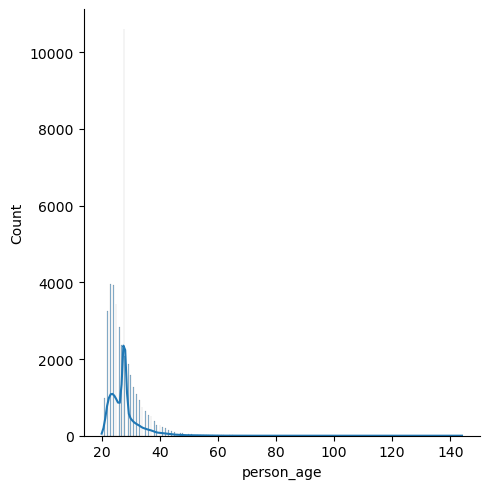

In [16]:
# majority of the ages of people who ask for a loan is between 20 and 60
sns.displot( data=df["person_age"], kde=True )

In [17]:
max_age = df["person_age"].max()
print("The maximum age is:", max_age)

The maximum age is: 144.0


In [18]:
most_frequent_age = df['person_age'].mode()[0]
print("The most frequent age is:", most_frequent_age)

The most frequent age is: 27.764329729101267


In [19]:
most_frequent_age = df['person_age'].mode()[0]
print("The most frequent age is:", most_frequent_age)

The most frequent age is: 27.764329729101267


In [20]:
max = df['person_income'].max()
min = df['person_income'].min()

print("Max = " + str(max) + ", Min = " + str(min))

Max = 7200766.0, Min = 8000.0


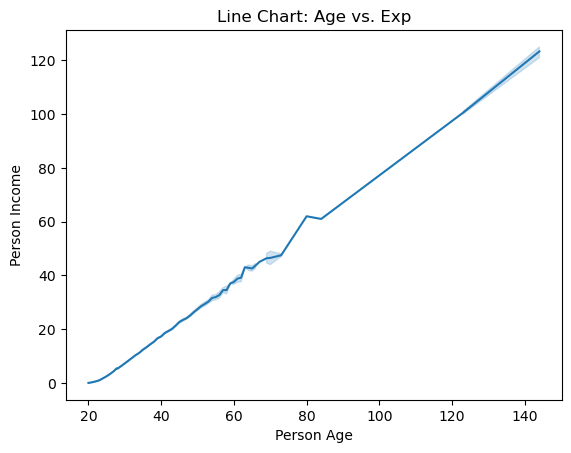

In [21]:
# as age increase the years of experiance increase
sns.lineplot(x=df['person_age'], y=df['person_emp_exp'])

plt.title("Line Chart: Age vs. Exp")
plt.xlabel("Person Age")
plt.ylabel("Person Income")
plt.show()

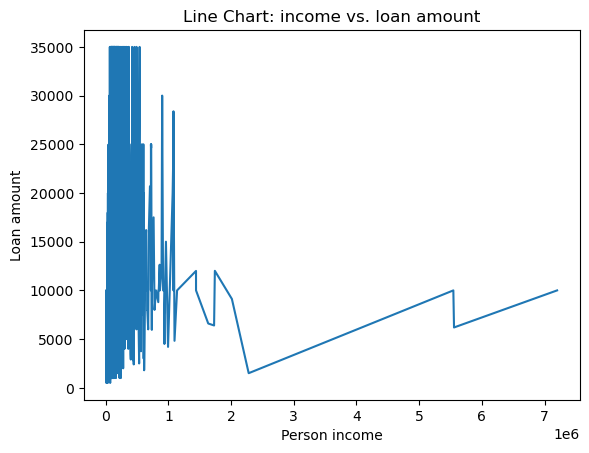

In [22]:
# As we can notice, there is an inverse relation between the person's income and the amont of the loan they ask for.
# i.e. the ones with high income tends to ask for small amount of loan.
sns.lineplot(x=df['person_income'], y=df['loan_amnt'])

plt.title("Line Chart: income vs. loan amount")
plt.xlabel("Person income")
plt.ylabel("Loan amount")
plt.show()

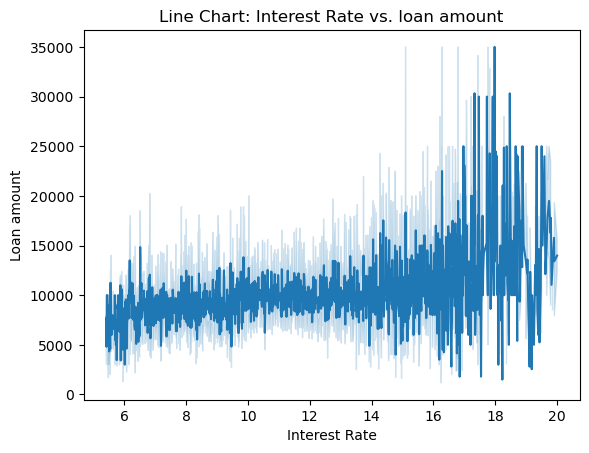

In [23]:
# Here we can see that, there exists a direct relation between the Loan amount and Interest Rate.
# Higher loan amount → Higher Loan Interest Rate
sns.lineplot(x=df['loan_int_rate'], y=df['loan_amnt'])

plt.title("Line Chart: Interest Rate vs. loan amount")
plt.xlabel("Interest Rate")
plt.ylabel("Loan amount")
plt.show()

<Axes: xlabel='loan_percent_income', ylabel='Density'>

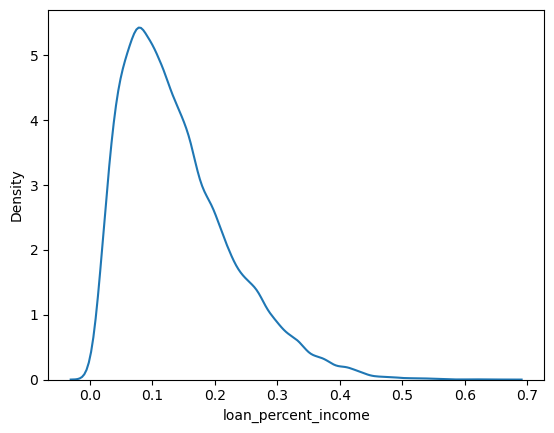

In [24]:
# the value of the loan percent income varies for the majority between 0% and 50% which means that if the value exceeded 
# the 50% the risk that the person wont be able to fullfill it will be higher. and majorly will be rejected.
sns.kdeplot(df['loan_percent_income'])

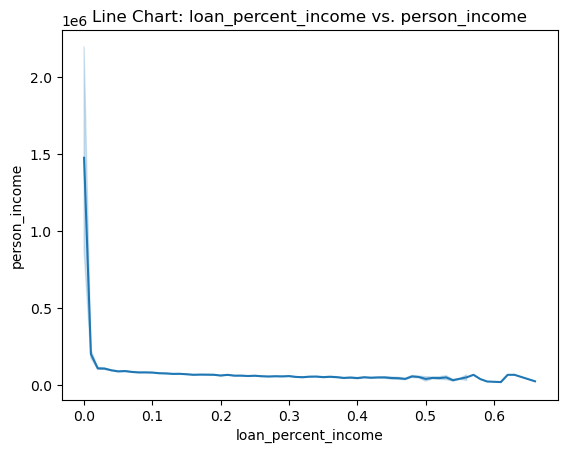

In [25]:
# by paying attention to this equation Loan Percent Income=(Loan Amount/Annual Income)×100 with the previous 
# visual we would notice that there exists an inverse relation between loan percent income and annual income.
sns.lineplot(x=df['loan_percent_income'], y=df['person_income'])

plt.title("Line Chart: loan_percent_income vs. person_income")
plt.xlabel("loan_percent_income")
plt.ylabel("person_income")
plt.show()

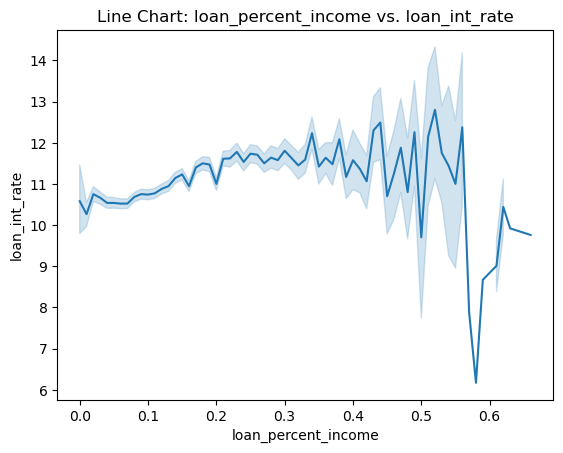

In [26]:
# As we understood from the curve, there could be a positive correlation between loan percent income 
# and loan interest rate, meaning the higher the percentage of income used for the loan, the higher the 
# interest rate charged due to increased perceived risk, leading lenders to increase the interest rate as a
# precaution against potential default.
# Higher Loan Percent Income → Higher Loan Interest Rate
sns.lineplot(x=df['loan_percent_income'], y=df['loan_int_rate'])

plt.title("Line Chart: loan_percent_income vs. loan_int_rate")
plt.xlabel("loan_percent_income")
plt.ylabel("loan_int_rate")
plt.show()

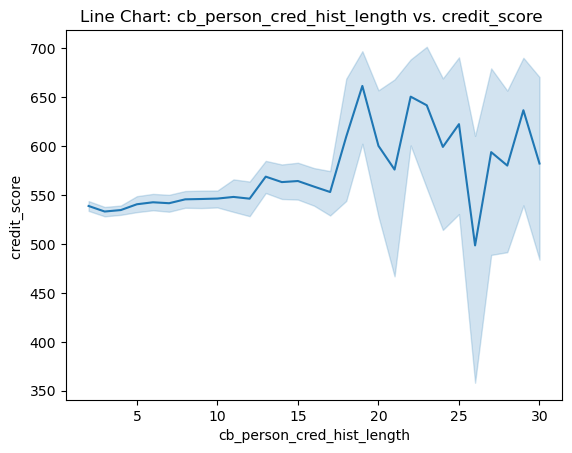

In [27]:
# A longer credit history tends to result in a higher credit score, as the individual has more
# data to show consistent credit management and repayments.
sns.lineplot(x=df['cb_person_cred_hist_length'], y=df['credit_score'])

plt.title("Line Chart: cb_person_cred_hist_length vs. credit_score ")
plt.xlabel("cb_person_cred_hist_length")
plt.ylabel("credit_score ")
plt.show()

Text(0, 0.5, 'Count')

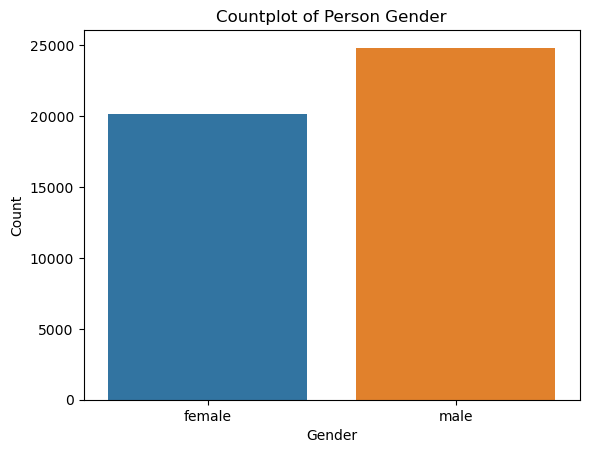

In [28]:
sns.countplot(x='person_gender', data=df)

plt.title('Countplot of Person Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

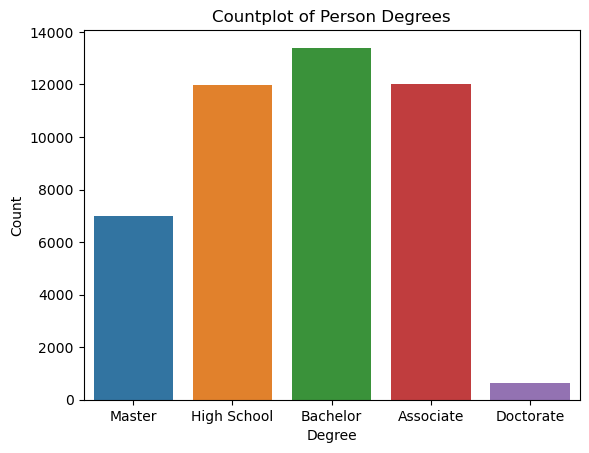

In [29]:
sns.countplot(x='person_education', data=df)

plt.title('Countplot of Person Degrees')
plt.xlabel('Degree')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

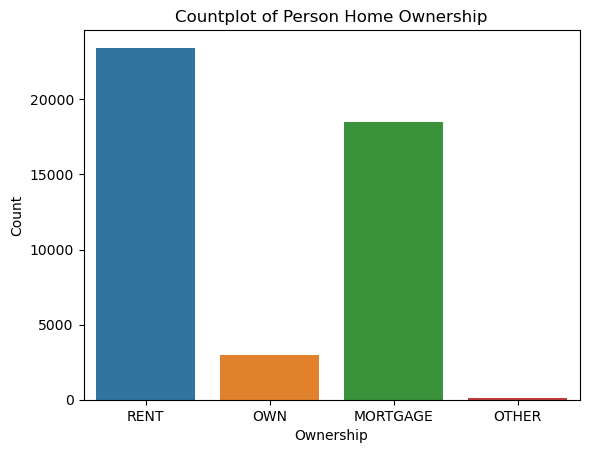

In [30]:
sns.countplot(x='person_home_ownership', data=df)

plt.title('Countplot of Person Home Ownership')
plt.xlabel('Ownership')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

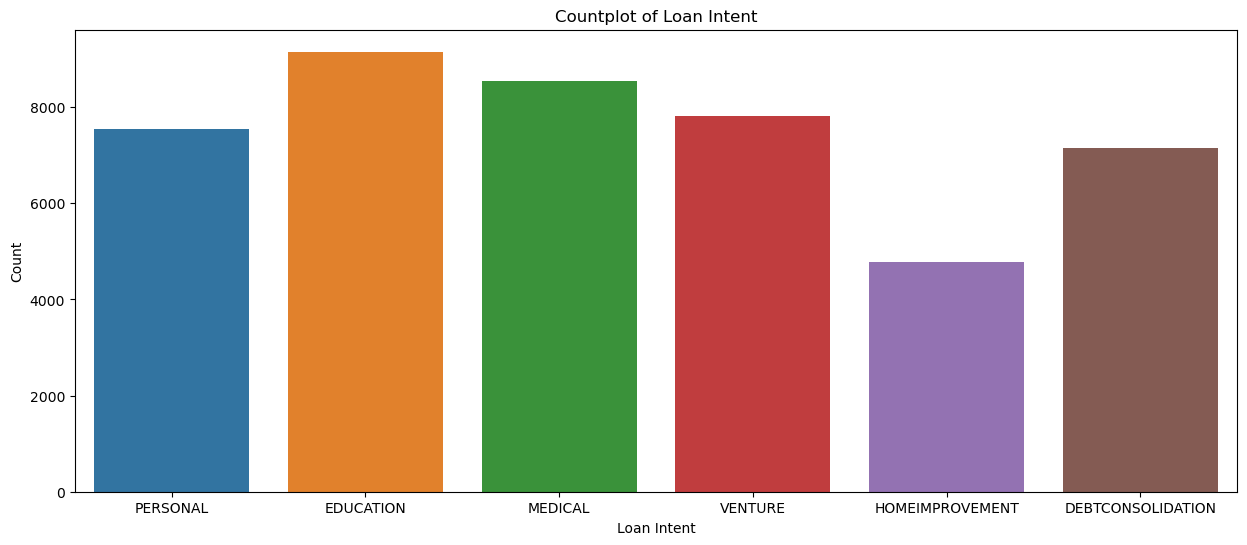

In [31]:
plt.figure(figsize=(15, 6))

sns.countplot(x='loan_intent', data=df)

plt.title('Countplot of Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

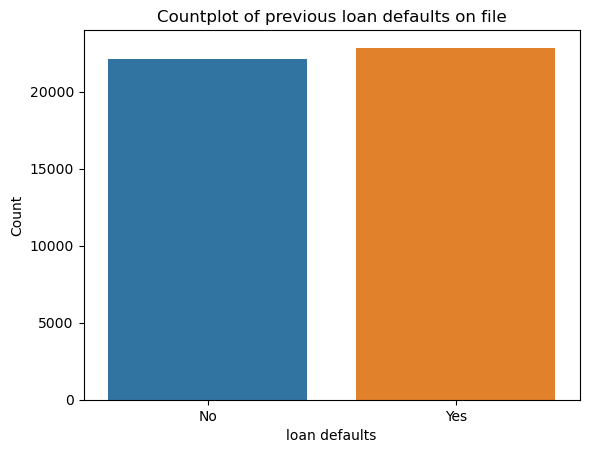

In [32]:
sns.countplot(x='previous_loan_defaults_on_file', data=df)

plt.title('Countplot of previous loan defaults on file')
plt.xlabel('loan defaults')
plt.ylabel('Count')

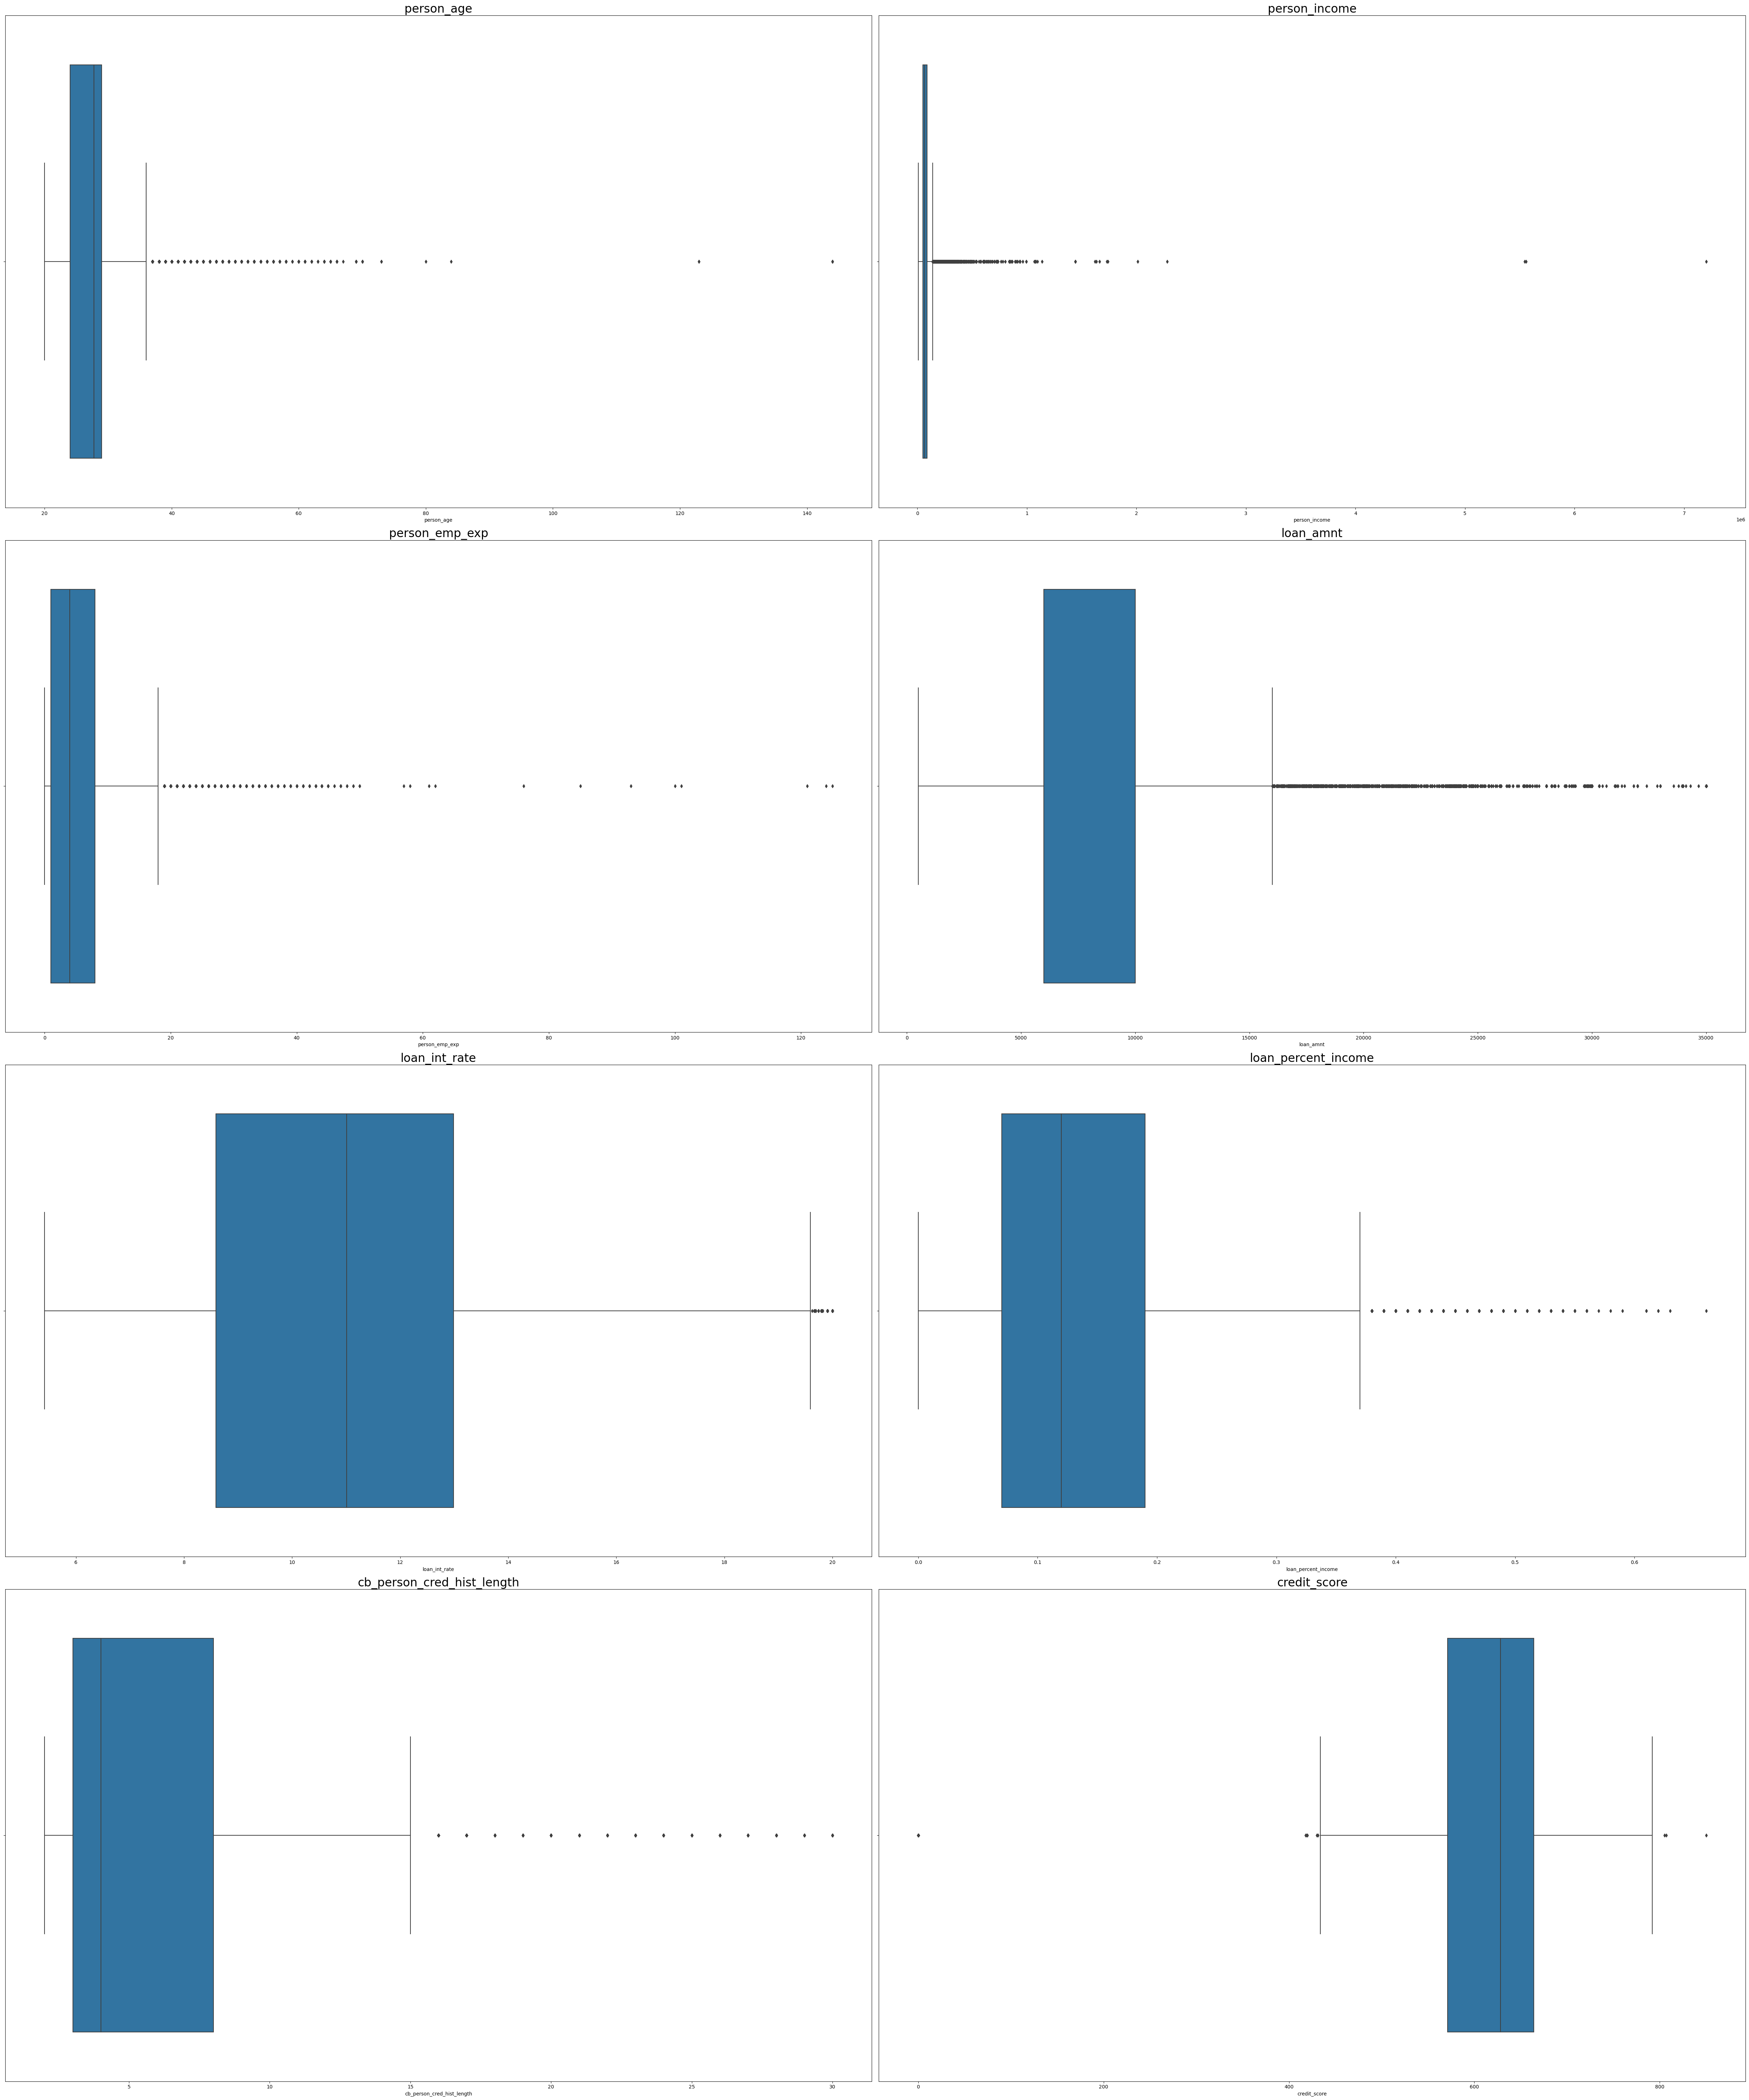

In [33]:
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(50, 60))
axes = axes.flatten()
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    if i < len(axes):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col, fontsize=24)
plt.tight_layout()
plt.show()

In [34]:
outliers_index = df[df['person_age'] > 80].index
df.drop(outliers_index, inplace=True, errors='ignore')

df['person_age'].max()

80.0

In [35]:
outliers_index = df[df['person_emp_exp'] > 65].index
df.drop(outliers_index, inplace=True, errors='ignore')

df['person_emp_exp'].max()

62

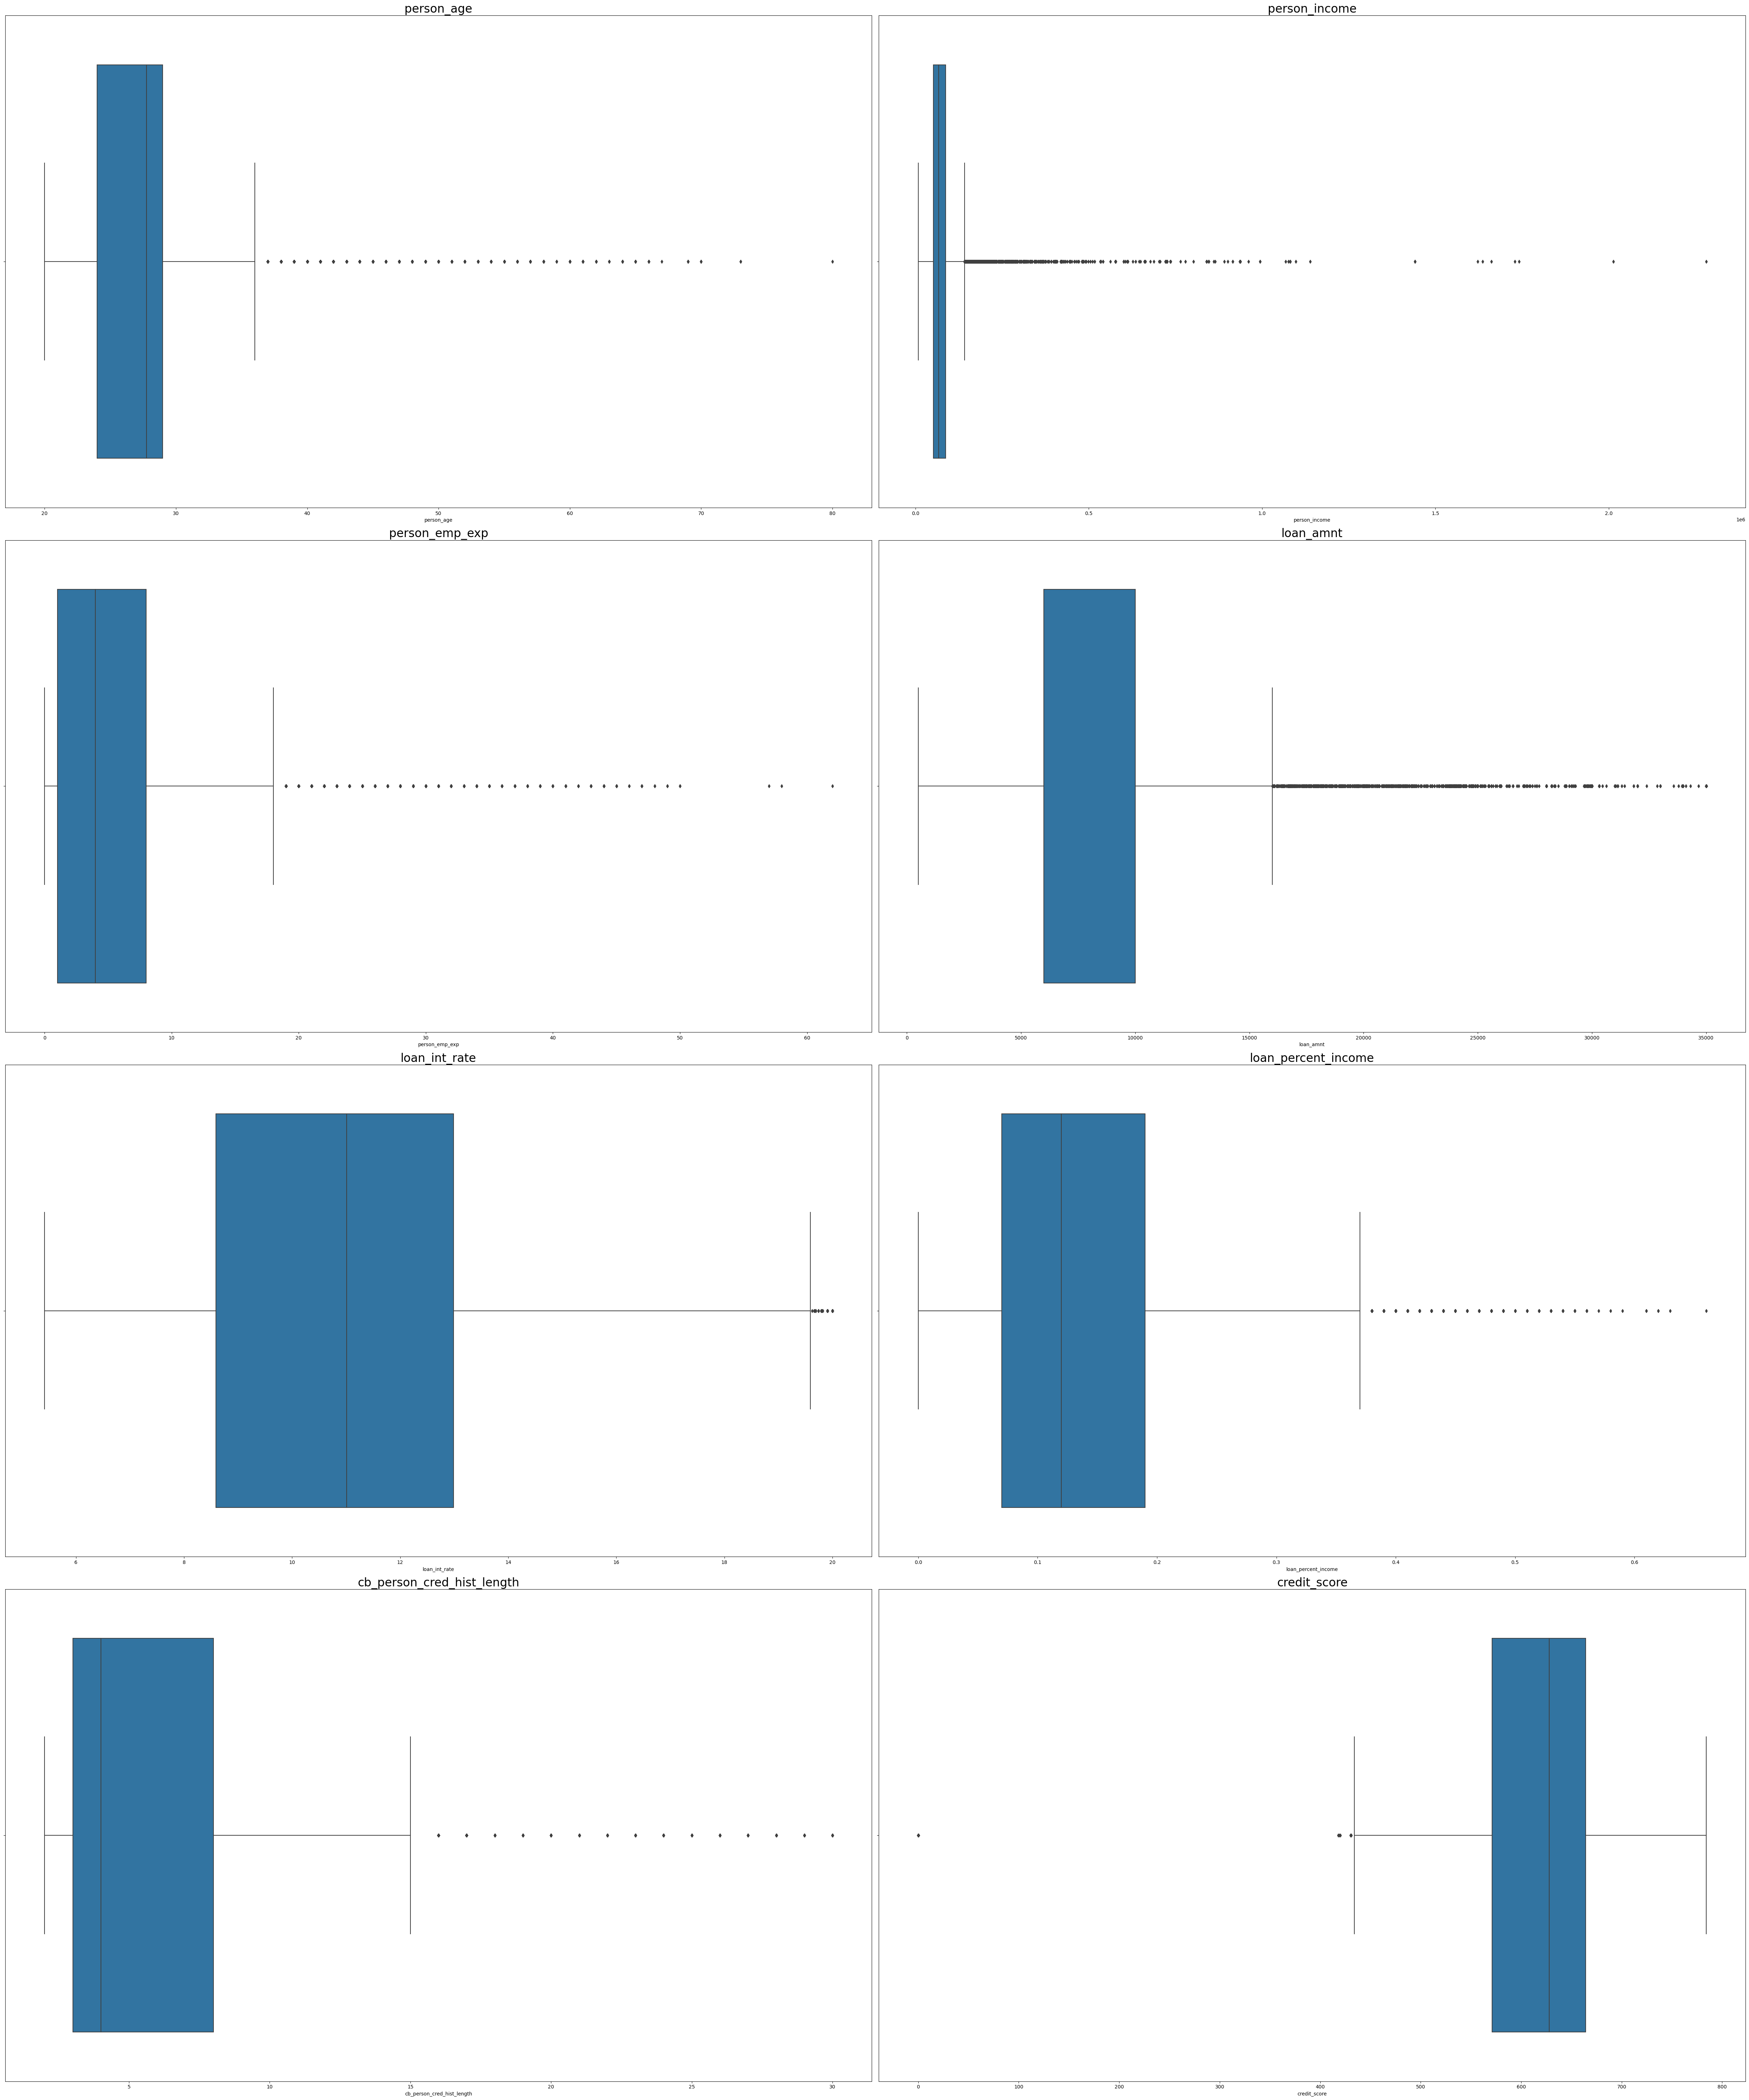

In [36]:
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(50, 60))
axes = axes.flatten()
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    if i < len(axes):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col, fontsize=24)
plt.tight_layout()
plt.show()

In [37]:
df_without = df.drop(columns=['loan_status'])

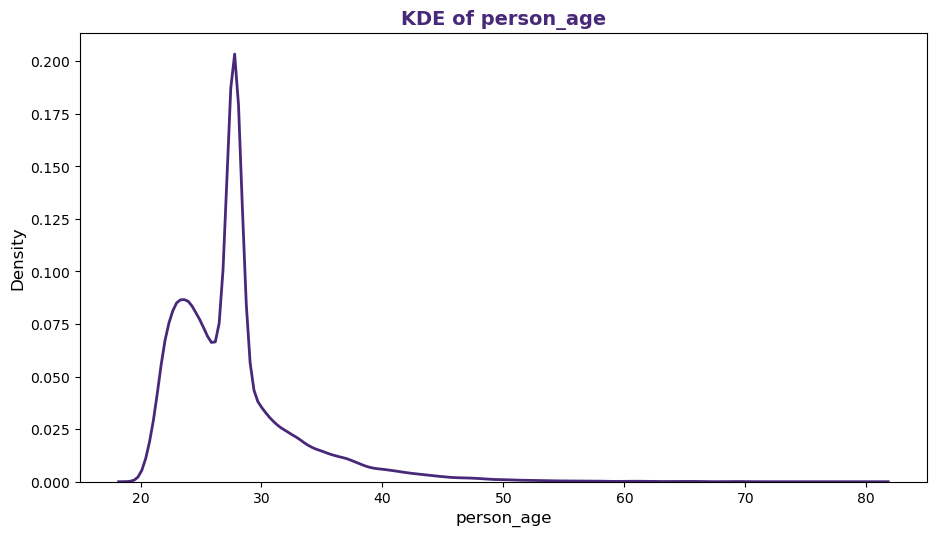

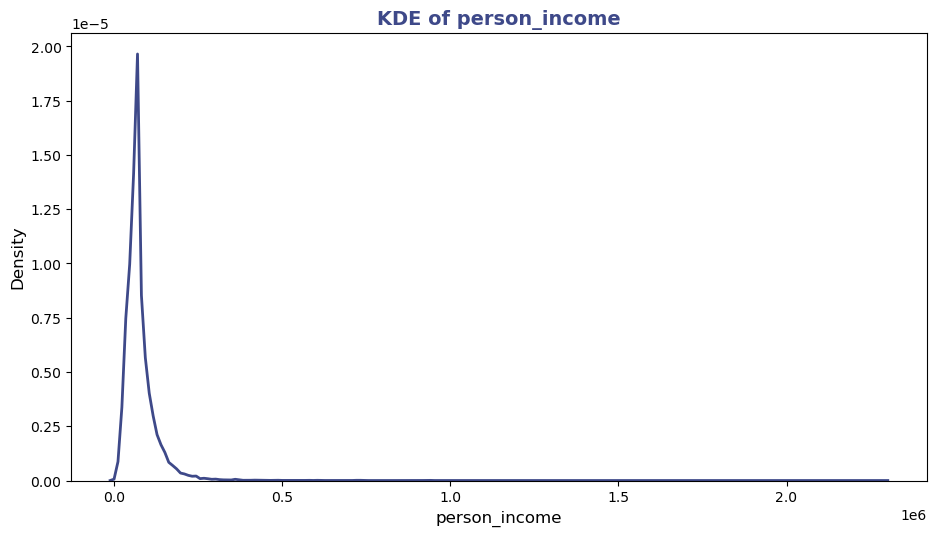

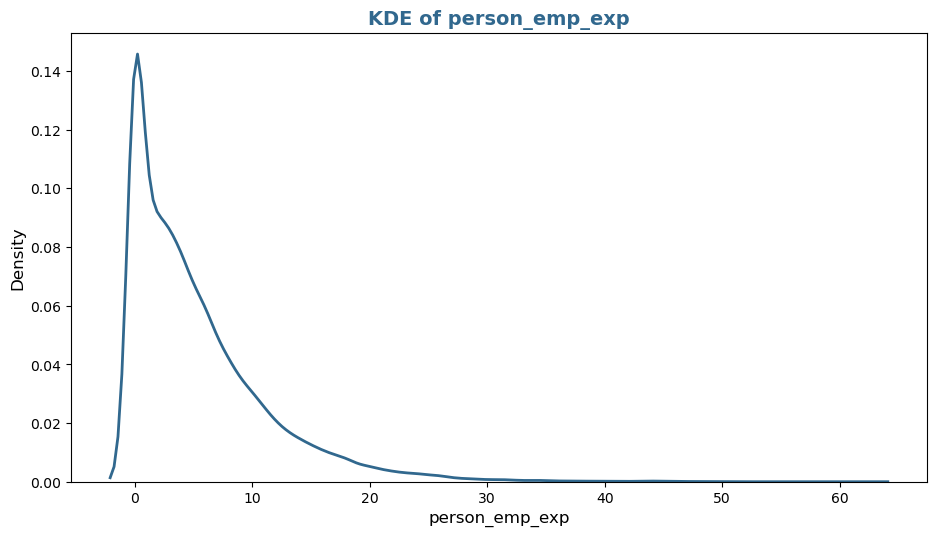

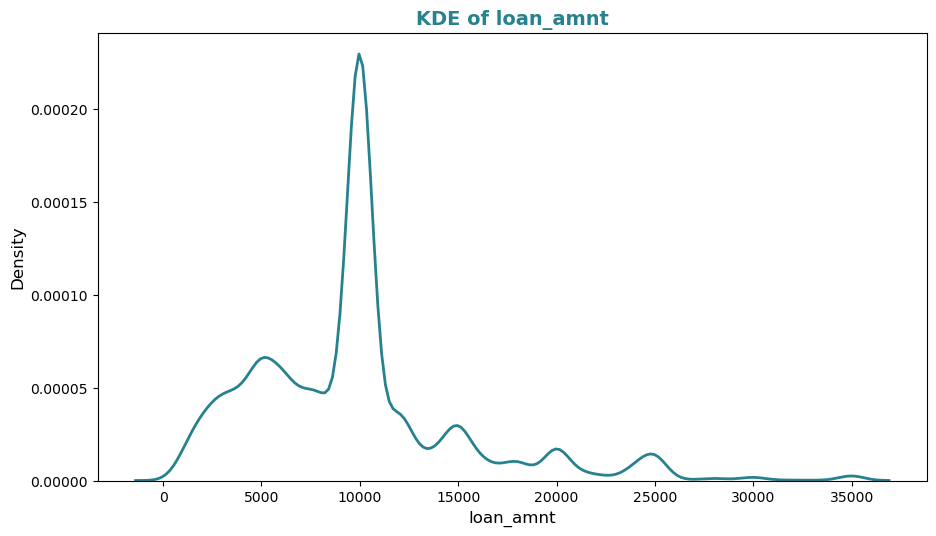

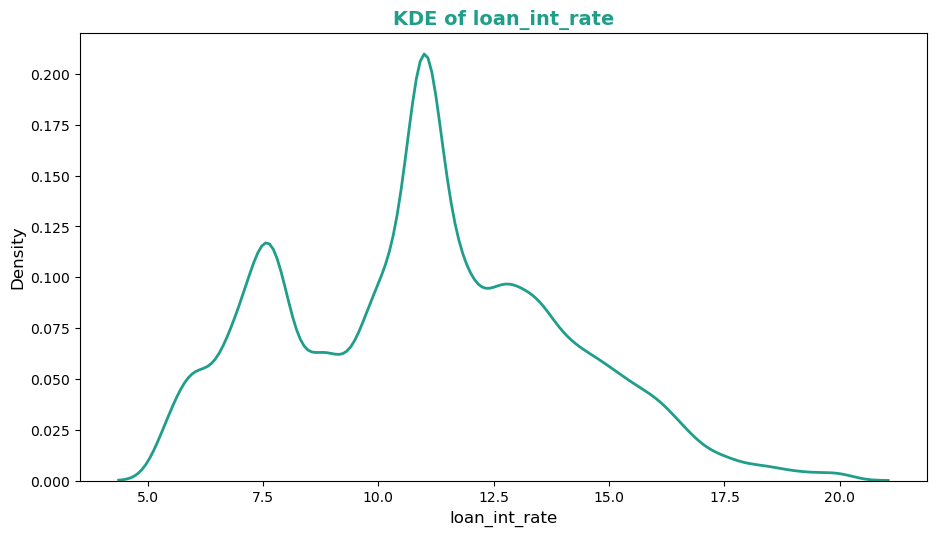

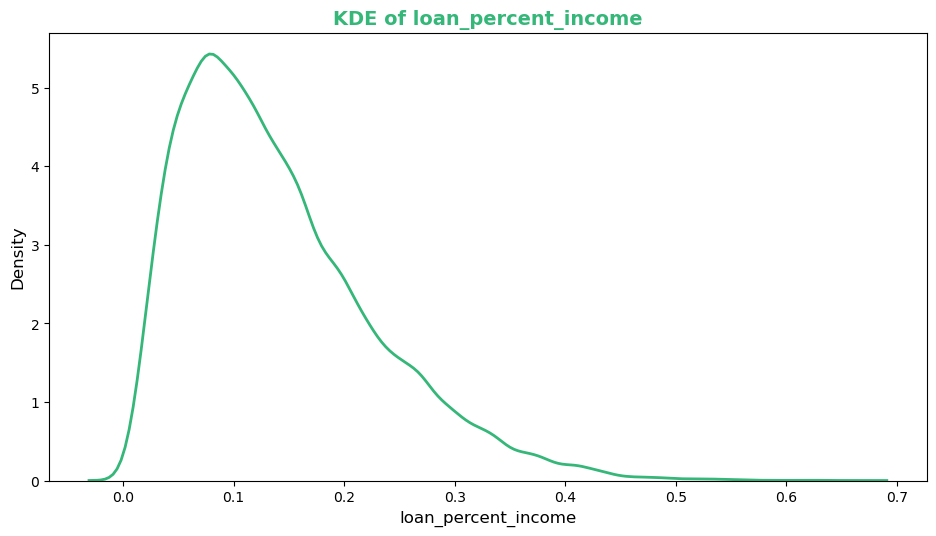

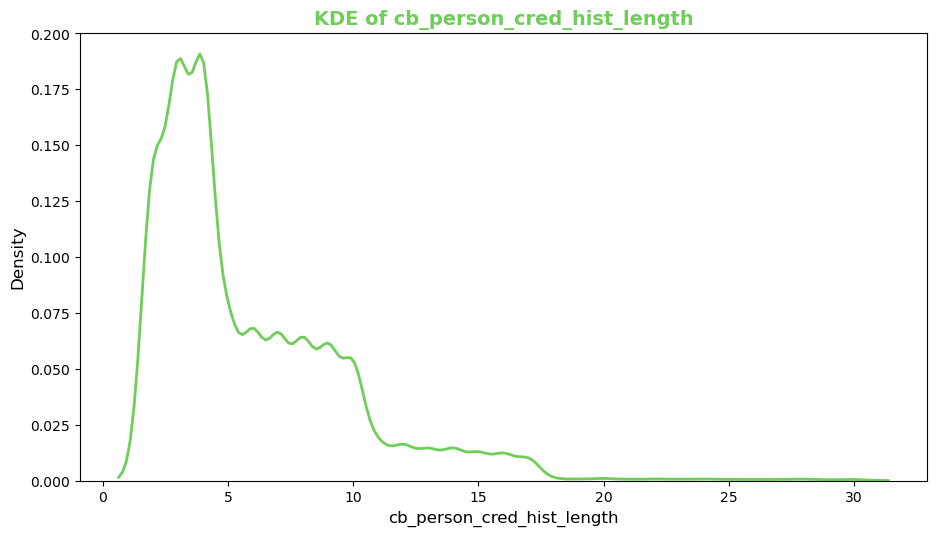

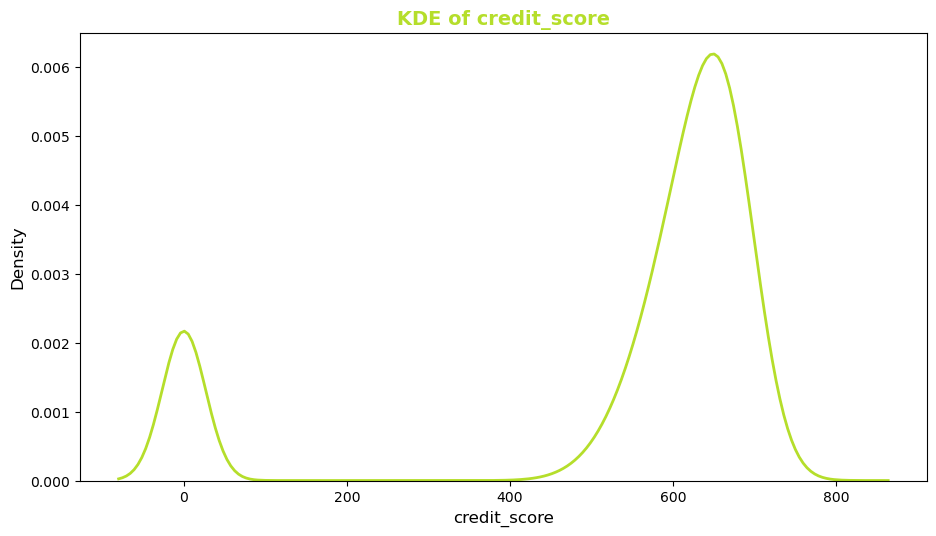

In [38]:
# higher income values are less frequent.
# The density curve peaks sharply around 0-2 years of employment experience, indicating that the majority of individuals have low employment experience.
# There is a prominent peak around the 10,000 loan amount, indicating that this loan amount is the most common in the dataset.

color_palette = sns.color_palette("viridis", len(df_without.select_dtypes(include=['float64', 'int64']).columns))

for i, column in enumerate(df_without.select_dtypes(include=['float64', 'int64']).columns):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_without[column], color=color_palette[i], linewidth=2)
    plt.title(f'KDE of {column}', fontsize=14, fontweight='bold', color=color_palette[i])
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)

    plt.tight_layout(pad=3.0)
    plt.show()

In [39]:
df_without['loan_status'] = df['loan_status']

In [40]:
df_without.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,27.76433,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561.0,No,approved
1,27.76433,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504.0,Yes,rejected
2,25.00000,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635.0,No,approved
3,27.76433,female,Bachelor,67002.5,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675.0,No,approved
4,24.00000,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586.0,No,approved


In [41]:
df=df_without

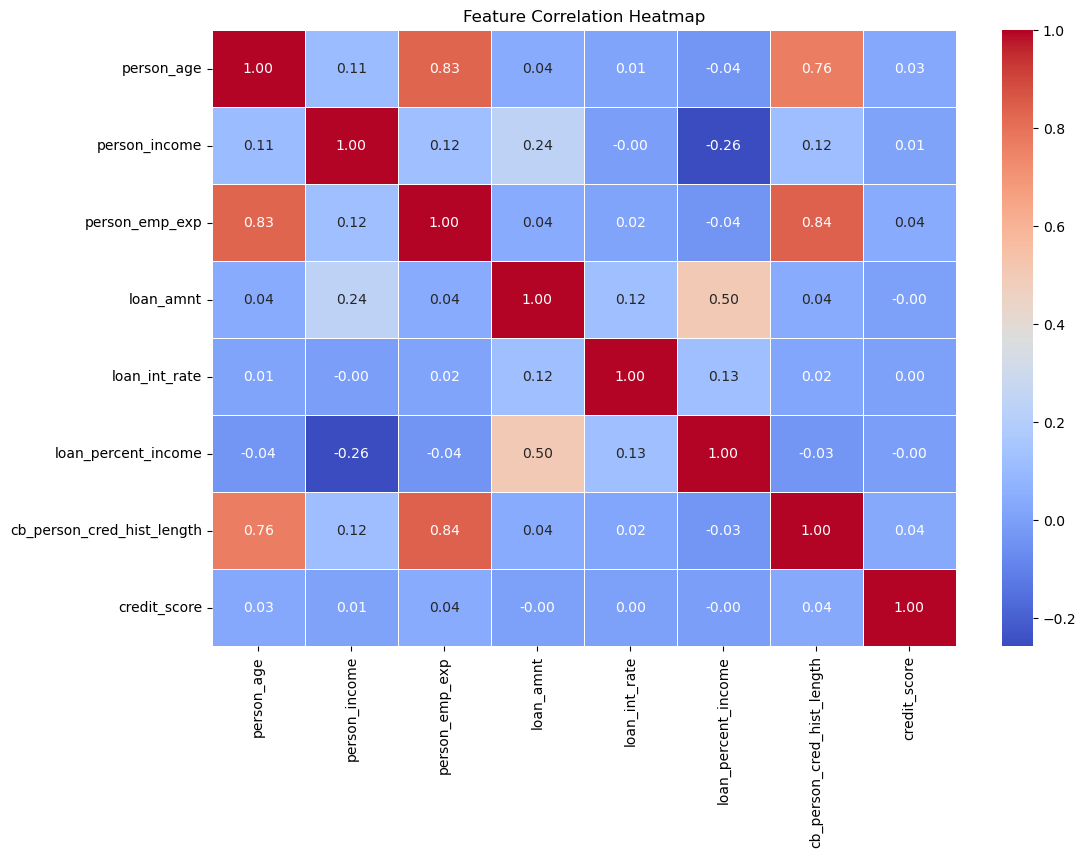

In [42]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [56]:
df_preprocessed = df.copy()

In [57]:
df_preprocessed['loan_ratio'] = (df_preprocessed['loan_amnt'] + df_preprocessed['loan_percent_income']) / 2
df_preprocessed.drop(columns=['loan_amnt', 'loan_percent_income'], inplace=True)

In [43]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder=LabelEncoder()
# categorical_column=['person_gender','loan_status','person_education', 'person_home_ownership',
#        'loan_intent', 'previous_loan_defaults_on_file'] #loan_status----0-->approved,1--->rejected  person_gender---0-->F 1--->M
# for column in categorical_column:
#     df[column]=label_encoder.fit_transform(df[column])  

In [44]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,27.76433,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3,561.0,0,0
1,27.76433,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2,504.0,1,1
2,25.00000,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3,635.0,0,0
3,27.76433,0,1,67002.5,0,3,35000.0,3,15.23,0.44,2,675.0,0,0
4,24.00000,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4,586.0,0,0


In [58]:
categorical_features = ['person_gender', 'loan_status', 'person_education', 'person_home_ownership',
                        'loan_intent', 'previous_loan_defaults_on_file']

# loan_status: 0 --> approved, 1 --> rejected
# person_gender: 0 --> F, 1 --> M
numerical_features = ['person_emp_exp', 'loan_int_rate', 'loan_ratio', 'person_age',
                      'person_income', 'credit_score', 'cb_person_cred_hist_length']

# Step 1: Encode Categorical Features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_preprocessed[col] = le.fit_transform(df_preprocessed[col])
    label_encoders[col] = le  # Store encoders if needed later

# Step 2: Impute Missing Values for Numeric Features
imputer = SimpleImputer(strategy='mean')
df_preprocessed[numerical_features] = imputer.fit_transform(df_preprocessed[numerical_features])

# # Step 3: Scale Numeric Features
# scaler = StandardScaler()
# df_preprocessed[numerical_features] = scaler.fit_transform(df_preprocessed[numerical_features])

# Optional: Print the preprocessed DataFrame
print(df_preprocessed.head())

   person_age  person_gender  person_education  person_income  person_emp_exp  \
0    0.002575              0                 4      -0.094794       -0.911987   
1    0.002575              0                 3      -1.136499       -0.911987   
2   -0.535378              0                 3      -1.133775       -0.404550   
3    0.002575              0                 1      -0.181137       -0.911987   
4   -0.729983              1                 4      -0.196283       -0.742841   

   person_home_ownership  loan_intent  loan_int_rate  \
0                      3            4       1.682954   
1                      2            1       0.044806   
2                      0            3       0.625543   
3                      3            3       1.417762   
4                      3            3       1.095503   

   cb_person_cred_hist_length  credit_score  previous_loan_defaults_on_file  \
0                   -0.739534      0.088268                               0   
1                 

In [61]:
X = df_preprocessed.drop(columns=['loan_status'])  # Features
y = df_preprocessed['loan_status']  # Dependent variable

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print the shapes of the resulting datasets
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training feature set shape: (35992, 12)
Testing feature set shape: (8999, 12)
Training labels shape: (35992,)
Testing labels shape: (8999,)


In [63]:
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
KNC = KNeighborsClassifier()
naive_bayes = GaussianNB()

In [64]:
LR = LogisticRegression(random_state=42)
DTC = DecisionTreeClassifier(random_state=42)
KNC = KNeighborsClassifier()
naive_bayes = GaussianNB()

# Create a dictionary of classifiers for iteration
classifiers = {
    'Logistic Regression': LR,
    'Decision Tree': DTC,
    'K-Nearest Neighbors': KNC,
    'Naive Bayes': naive_bayes
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

--- Logistic Regression ---
Accuracy: 0.8654
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      2000
           1       0.91      0.92      0.91      6999

    accuracy                           0.87      8999
   macro avg       0.81      0.80      0.80      8999
weighted avg       0.86      0.87      0.86      8999

Confusion Matrix:
[[1362  638]
 [ 573 6426]]


--- Decision Tree ---
Accuracy: 0.8858
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      2000
           1       0.93      0.92      0.93      6999

    accuracy                           0.89      8999
   macro avg       0.83      0.84      0.84      8999
weighted avg       0.89      0.89      0.89      8999

Confusion Matrix:
[[1501  499]
 [ 529 6470]]


--- K-Nearest Neighbors ---
Accuracy: 0.8592
Classification Report:
              precision    recall  f1-score   support


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy'])

# Models to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Evaluate each model
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    
    # Append results to the DataFrame
    results_df = results_df.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }, ignore_index=True)

# Display the results DataFrame
print(results_df)


In [73]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Ridge Regularization (L2)
# ridge_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
# ridge_model.fit(X_train, y_train)
# ridge_y_pred = ridge_model.predict(X_test)

# print("--- Ridge Regularization ---")
# print(f"Accuracy: {accuracy_score(y_test, ridge_y_pred):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, ridge_y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, ridge_y_pred))
# print("\n")

# # Lasso Regularization (L1)
# lasso_model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42)
# lasso_model.fit(X_train, y_train)
# lasso_y_pred = lasso_model.predict(X_test)

# print("--- Lasso Regularization ---")
# print(f"Accuracy: {accuracy_score(y_test, lasso_y_pred):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, lasso_y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, lasso_y_pred))
# print("\n")
steps_ridge = [
    ('scaler', StandardScaler()),  # Step 1: Standard Scaling
    ('poly', PolynomialFeatures(degree=2)),  # Step 2: Add Polynomial Features
    ('model', Ridge(alpha=10))  # Step 3: Ridge Regression
]
ridge_pipeline = Pipeline(steps_ridge)
ridge_pipeline.fit(X_train, y_train)

# Predict and Evaluate Ridge
ridge_train_pred = ridge_pipeline.predict(X_train)
ridge_test_pred = ridge_pipeline.predict(X_test)

ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_r2 = r2_score(y_test, ridge_test_pred)

print("--- Ridge Regression ---")
print(f"Training MSE: {ridge_train_mse:.4f}")
print(f"Test MSE: {ridge_test_mse:.4f}")
print(f"R2 Score: {ridge_r2:.4f}")
print("\n")

# Lasso Regression Pipeline
steps_lasso = [
    ('scaler', StandardScaler()),  # Step 1: Standard Scaling
    ('poly', PolynomialFeatures(degree=2)),  # Step 2: Add Polynomial Features
    ('model', Lasso(alpha=0.3))  # Step 3: Lasso Regression
]
lasso_pipeline = Pipeline(steps_lasso)
lasso_pipeline.fit(X_train, y_train)

# Predict and Evaluate Lasso
lasso_train_pred = lasso_pipeline.predict(X_train)
lasso_test_pred = lasso_pipeline.predict(X_test)

lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
lasso_r2 = r2_score(y_test, lasso_test_pred)

print("--- Lasso Regression ---")
print(f"Training MSE: {lasso_train_mse:.4f}")
print(f"Test MSE: {lasso_test_mse:.4f}")
print(f"R2 Score: {lasso_r2:.4f}")

--- Ridge Regression ---
Training MSE: 0.0873
Test MSE: 0.0903
R2 Score: 0.4777


--- Lasso Regression ---
Training MSE: 0.1729
Test MSE: 0.1729
R2 Score: -0.0000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22440\3005941597.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22440\3005941597.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.867220       0.865429
1        Decision Tree        1.000000       0.885765
2  K-Nearest Neighbors        0.906090       0.859207
3          Naive Bayes        0.731107       0.736526


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22440\3005941597.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22440\3005941597.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
